In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Com os dados coletados e armazenados na etapa anterior foi criado um DataFrame para centralizar as informações.

In [2]:
nomes_df = pd.read_csv('nomesServidores.csv')
primeiro_nome_df = pd.read_csv('primeiroNomeServidores.csv')

ufrn_df = nomes_df.copy()
ufrn_df['Primeiro Nome'] = primeiro_nome_df['Nome']
ufrn_df['Nacionalidade'] = 'BR'
ufrn_df.head()

,Unnamed: 0,Nome do Servidor,Primeiro Nome,Nacionalidade
0,0,ABDO FARRET NETO,ABDO,BR
1,1,ABMAEL BEZERRA DE OLIVEIRA,ABMAEL,BR
2,2,ABNER CARLOS COSTA DE MELO,ABNER,BR
3,3,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA ...,ABRAHAO,BR
4,4,ACACIA JESSICA MAIA DE MOURA,ACACIA,BR


In [3]:
len(ufrn_df.drop_duplicates(subset='Primeiro Nome'))

2263

A partir do dataframe foram criados arquivos CSV para utilização da ferramenta Gender API, cada arquivo com no máximo 500 entradas sem repetição. Esses arquivos resultaram em outros arquivos CSV expandidos com os dados provenientes do Gender API.
```python
ufrn_df.drop_duplicates(subset='Primeiro Nome')[0:500].to_csv('unique_primeiro_nome_1.csv')
ufrn_df.drop_duplicates(subset='Primeiro Nome')[500:1000].to_csv('unique_primeiro_nome_2.csv')
ufrn_df.drop_duplicates(subset='Primeiro Nome')[1000:1500].to_csv('unique_primeiro_nome_3.csv')
ufrn_df.drop_duplicates(subset='Primeiro Nome')[1500:2000].to_csv('unique_primeiro_nome_4.csv')
ufrn_df.drop_duplicates(subset='Primeiro Nome')[2000:].to_csv('unique_primeiro_nome_5.csv')
```

In [4]:
u_gender_1_df = pd.read_csv('gender_1.csv')
u_gender_2_df = pd.read_csv('gender_2.csv')
u_gender_3_df = pd.read_csv('gender_3.csv')
u_gender_4_df = pd.read_csv('gender_4.csv')
u_gender_5_df = pd.read_csv('gender_5.csv')

print(len(u_gender_1_df), len(u_gender_2_df), len(u_gender_3_df), len(u_gender_4_df), len(u_gender_5_df))

500 500 500 500 263


In [5]:
u_gender_ufrn_df = u_gender_1_df.append([u_gender_2_df, u_gender_3_df, u_gender_4_df, u_gender_5_df])
len(u_gender_ufrn_df)

2263

In [6]:
u_gender_ufrn_df['ga_gender'].isnull().sum()

300

In [7]:
u_gender_ufrn_df.head()

,Unnamed: 0,Nome do Servidor,Primeiro Nome,Nacionalidade,ga_firstname,ga_gender,ga_accuracy,ga_samples
0,0,ABDO FARRET NETO,ABDO,BR,abdo,male,100.0,17.0
1,1,ABMAEL BEZERRA DE OLIVEIRA,ABMAEL,BR,abmael,male,91.0,34.0
2,2,ABNER CARLOS COSTA DE MELO,ABNER,BR,abner,male,99.0,328.0
3,3,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA ...,ABRAHAO,BR,abrahao,male,95.0,21.0
4,4,ACACIA JESSICA MAIA DE MOURA,ACACIA,BR,acacia,female,100.0,30.0


In [8]:
gender_ufrn_df = ufrn_df.merge(u_gender_ufrn_df[['Primeiro Nome', 'ga_gender', 'ga_accuracy', 'ga_samples']], left_on='Primeiro Nome', right_on='Primeiro Nome')
gender_ufrn_df.to_csv('gender_ufrn.csv')

len(gender_ufrn_df)

6183

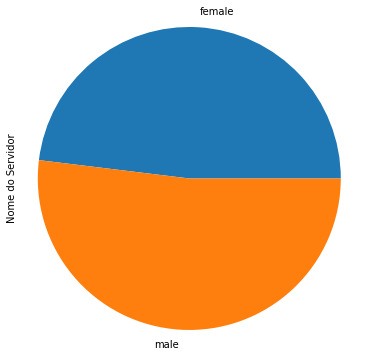

In [9]:
not_null_gender_ufrn_df = gender_ufrn_df.dropna()
not_null_gender_ufrn_df = not_null_gender_ufrn_df[not_null_gender_ufrn_df['ga_gender'] != 'unknown']
not_null_gender_ufrn_df['Nome do Servidor'].groupby(not_null_gender_ufrn_df['ga_gender']).count().plot(kind='pie', figsize=(6,6))
plt.axis('equal')
plt.show()